# In this Notebook we are trying to predict which adults will have an income of 50k€/yr or more.

_Done by: Toni Domènech Borrell_

## How are we trying to do it:
We are trying to answer the previous question by doing some Machine Learning.
This project is going to have the following structure:
* Exploratory Data Analysis
* Feature Engineering
* Finding a ML Model and executing it.

### About the Dataset:
This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics).

In [297]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [348]:
# First of all we charge our DataSet into df:
df = pd.read_csv('../Kaggle/Data/adult.csv')

In [299]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [300]:
# What are the type of our columns and what do we have.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education.num     32561 non-null int64
marital.status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital.gain      32561 non-null int64
capital.loss      32561 non-null int64
hours.per.week    32561 non-null int64
native.country    32561 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [301]:
# How many null values do we have.
df.isnull().sum()
# We can see the null information comes with a ?. Therefore the .isnull() method doesn't detect correctly the nulls.
# We will work on that later. On the Feature Engineering Section.

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

## EDA

**Age**

In [302]:
df['age'].value_counts()

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
85      3
88      3
87      1
86      1
Name: age, Length: 73, dtype: int64

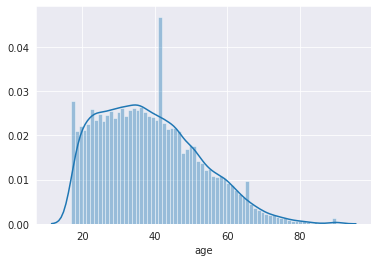

In [303]:
sns.set_style('darkgrid')
sns.distplot(df['age'], bins=70)

Now we are going to see how the age and the sex are related with the education you have recieved.
We can observe, in the higher education (large values of education.num) than the slope for the girls is much lower.

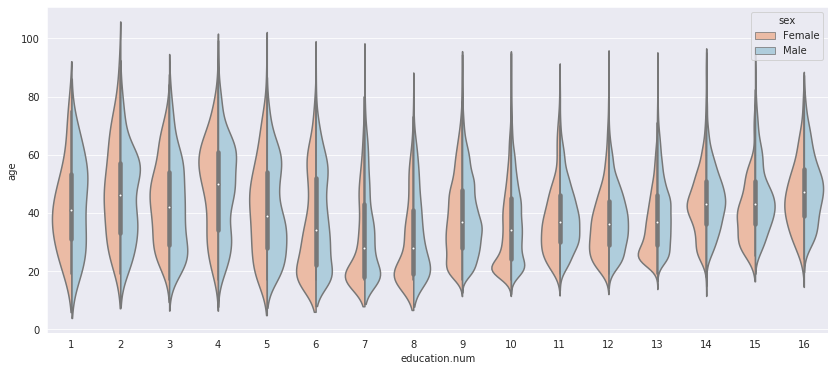

In [304]:
plt.figure(figsize = (14, 6))
sns.violinplot(y='age', x='education.num', hue='sex', palette = 'RdBu', data=df, split=True)
# We will discus it later but the education num it references in a scale of 1-16 how much had each person studied.

**Sex**

We can see that our dataset it isn't balanced. Neither the sex nor the income column.

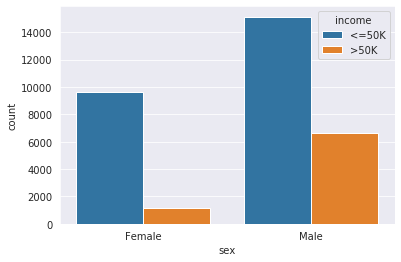

In [305]:
sns.countplot(x='sex', hue='income', data=df)

**WorkClass**

In [306]:
df['workclass'].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

As we can see, the _workclass_ feature it's important. We will see later what to do with: _?, Without-pay and Never-Worked._

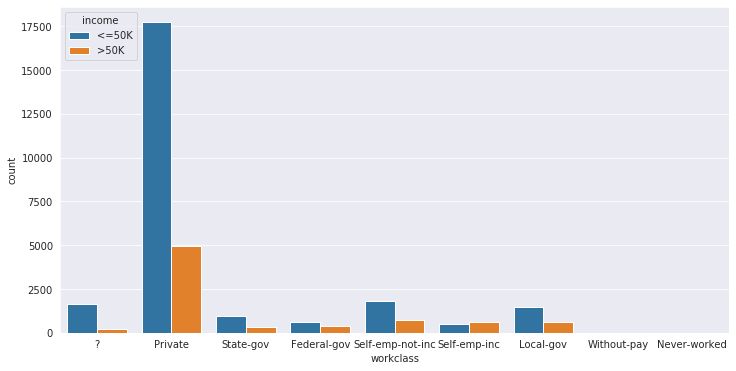

In [307]:
plt.figure(figsize=(12,6))
sns.countplot(x='workclass', hue='income', data=df)

Let's look more deeply into the Without-pay and Never-Worked:

In [308]:
df[df['workclass']=='Never-worked']

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
8874,18,Never-worked,206359,10th,6,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
13675,23,Never-worked,188535,7th-8th,4,Divorced,?,Not-in-family,White,Male,0,0,35,United-States,<=50K
17089,17,Never-worked,237272,10th,6,Never-married,?,Own-child,White,Male,0,0,30,United-States,<=50K
21934,18,Never-worked,157131,11th,7,Never-married,?,Own-child,White,Female,0,0,10,United-States,<=50K
24483,20,Never-worked,462294,Some-college,10,Never-married,?,Own-child,Black,Male,0,0,40,United-States,<=50K
32331,30,Never-worked,176673,HS-grad,9,Married-civ-spouse,?,Wife,Black,Female,0,0,40,United-States,<=50K
32338,18,Never-worked,153663,Some-college,10,Never-married,?,Own-child,White,Male,0,0,4,United-States,<=50K


In [309]:
df[df['workclass']=='Without-pay']

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
3277,22,Without-pay,302347,HS-grad,9,Never-married,Handlers-cleaners,Own-child,White,Male,4416,0,40,United-States,<=50K
3914,65,Without-pay,172949,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,2414,0,20,United-States,<=50K
5866,65,Without-pay,27012,7th-8th,4,Widowed,Farming-fishing,Unmarried,White,Female,0,0,50,United-States,<=50K
12271,19,Without-pay,344858,HS-grad,9,Never-married,Farming-fishing,Own-child,White,Male,0,0,20,United-States,<=50K
17760,21,Without-pay,232719,HS-grad,9,Never-married,Craft-repair,Own-child,Black,Male,0,0,40,United-States,<=50K
18874,46,Without-pay,142210,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Wife,White,Female,0,0,25,United-States,<=50K
23337,52,Without-pay,198262,HS-grad,9,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,30,United-States,<=50K
23587,19,Without-pay,43887,HS-grad,9,Never-married,Farming-fishing,Own-child,White,Male,0,0,10,United-States,<=50K
25647,62,Without-pay,170114,Assoc-acdm,12,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
26423,29,Without-pay,212588,Some-college,10,Married-civ-spouse,Farming-fishing,Own-child,White,Male,0,0,65,United-States,<=50K


The _?_ in occupation corresponds to the people that never had worked. Therefore, we ain't going to delete it.

**FNLWGT**: "The continuous variable fnlwgt represents final weight, which is the number of units in the target population that the responding unit represents."



In [310]:
df['fnlwgt'].value_counts()

123011    13
203488    13
164190    13
126675    12
121124    12
          ..
36376      1
78567      1
180407     1
210869     1
125489     1
Name: fnlwgt, Length: 21648, dtype: int64

Since we see a two orders of magnitude of difference between the min and the max we cannot forget about this. We will think how to do it later.

In [311]:
print(df['fnlwgt'].min())
print('\n')
print(df['fnlwgt'].max())

12285


1484705


**Education and Education.Num**

Education and education.num are exactly the same. This known, we will start discussing the education by race. This is really interesting and we will do some more study about that in the _Race_ subsection. We have another interesting plot talking about this before. The violinplot in the _Age_ subsection

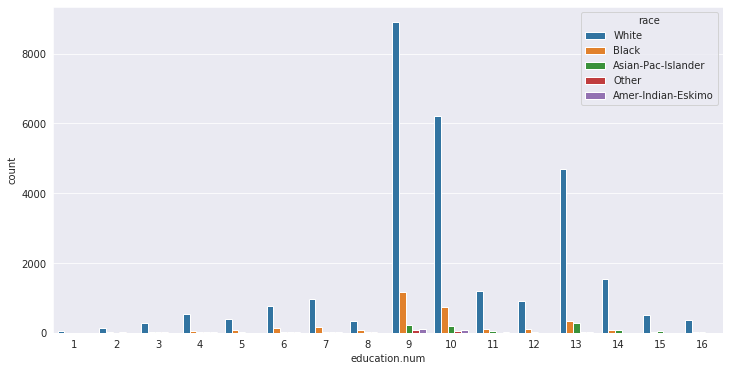

In [312]:
plt.figure(figsize=(12,6))
sns.countplot(x = 'education.num', hue='race', data=df)

**Marital Status**

In [313]:
df['marital.status'].value_counts()

Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital.status, dtype: int64

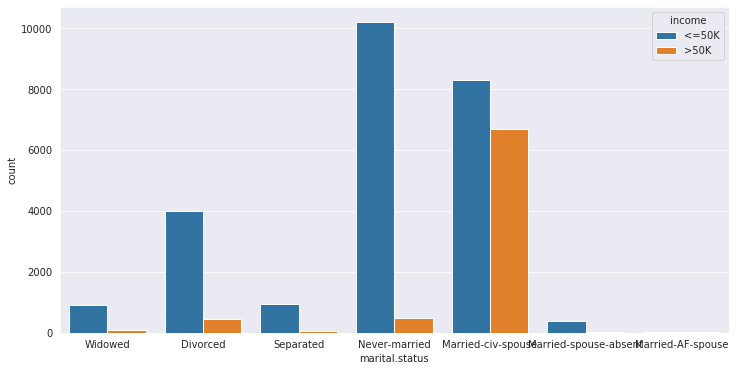

In [314]:
plt.figure(figsize=(12,6))
sns.countplot(x='marital.status', hue = 'income', data = df)

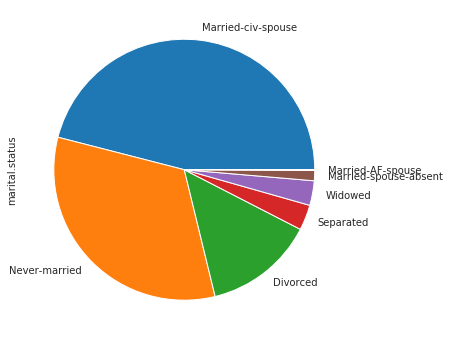

In [315]:
plt.figure(figsize=(6,6))
df['marital.status'].value_counts().plot.pie()

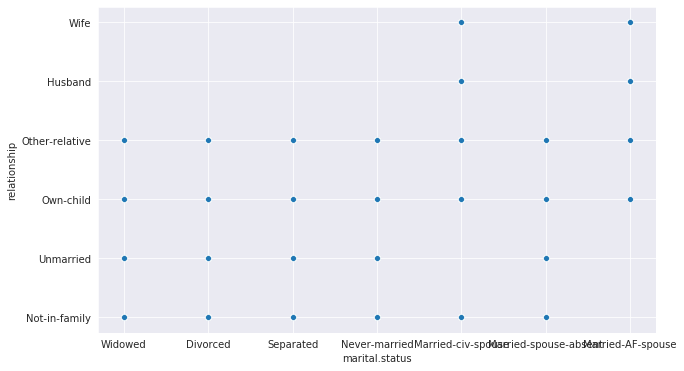

In [316]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='marital.status', y='relationship', data = df)

**Occupation**

In [317]:
df['occupation'].value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

**Race, capital.gain, capital.loss, Hours per Week**

We are doing this three subsections because they can be treated this way (as many others) but here we have interesting insights.

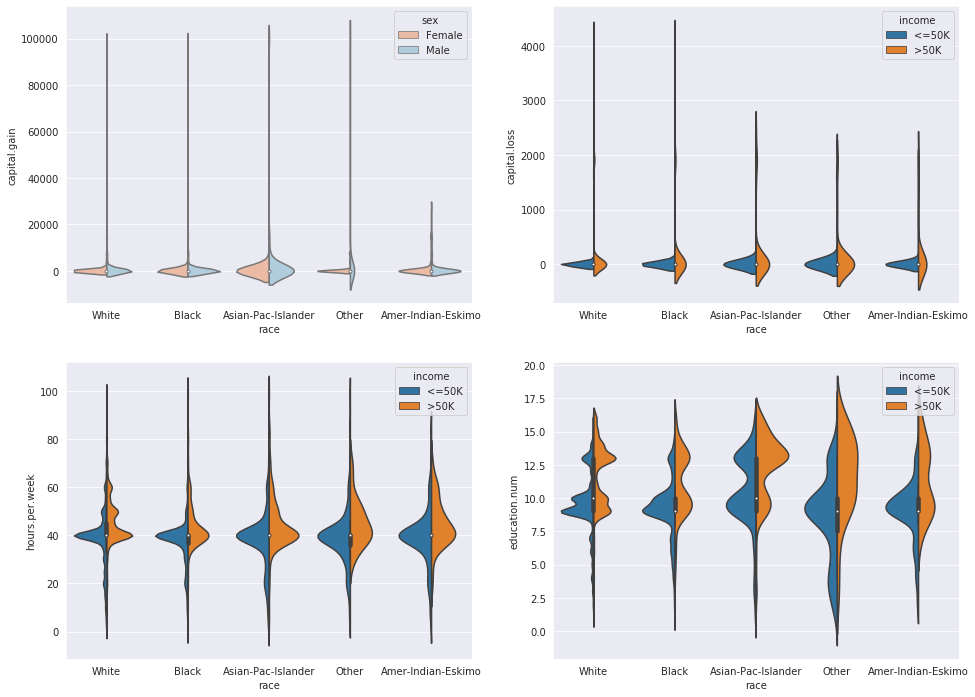

In [318]:
plt.figure(figsize=(16,12))


plt.subplot(2,2,1)
sns.violinplot(x = df['race'], y = df['capital.gain'], hue='sex', split=True, data = df ,palette = 'RdBu')
plt.subplot(2,2,2)
sns.violinplot(x = df['race'], y = df['capital.loss'],  hue='income', split=True,data = df)
plt.subplot(2,2,3)
sns.violinplot(x = df['race'], y = df['hours.per.week'], hue='income', split=True, data = df)
plt.subplot(2,2,4)
sns.violinplot(x = df['race'], y = df['education.num'], hue='income', split=True,data = df)

**Native Country**

In [319]:
df['native.country'].value_counts()

United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece                      

In [349]:
df = df[df['native.country']!='?']

In [321]:
native_more = df.loc[df['income'] == '>50K',['native.country']].groupby('native.country').size()
native_less = df.loc[df['income'] == '<=50K',['native.country']].groupby('native.country').size()

index_more = list(native_more.index)
index_less = list(native_less.index)

# Checking if the Countries in both aspects are same or not
print(index_more)
print(len(index_more))
print(index_less)
print(len(index_less))

['Cambodia', 'Canada', 'China', 'Columbia', 'Cuba', 'Dominican-Republic', 'Ecuador', 'El-Salvador', 'England', 'France', 'Germany', 'Greece', 'Guatemala', 'Haiti', 'Honduras', 'Hong', 'Hungary', 'India', 'Iran', 'Ireland', 'Italy', 'Jamaica', 'Japan', 'Laos', 'Mexico', 'Nicaragua', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Puerto-Rico', 'Scotland', 'South', 'Taiwan', 'Thailand', 'Trinadad&Tobago', 'United-States', 'Vietnam', 'Yugoslavia']
39
['Cambodia', 'Canada', 'China', 'Columbia', 'Cuba', 'Dominican-Republic', 'Ecuador', 'El-Salvador', 'England', 'France', 'Germany', 'Greece', 'Guatemala', 'Haiti', 'Holand-Netherlands', 'Honduras', 'Hong', 'Hungary', 'India', 'Iran', 'Ireland', 'Italy', 'Jamaica', 'Japan', 'Laos', 'Mexico', 'Nicaragua', 'Outlying-US(Guam-USVI-etc)', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Puerto-Rico', 'Scotland', 'South', 'Taiwan', 'Thailand', 'Trinadad&Tobago', 'United-States', 'Vietnam', 'Yugoslavia']
41


In [322]:
# Checking which Countries are not in the list of more than 50k.
[country for country in index_less if country not in index_more]

['Holand-Netherlands', 'Outlying-US(Guam-USVI-etc)']

In [323]:
# Making DataFrames of the Data
df_more = pd.DataFrame({'Countries' : index_more, '>50K' : list(native_more) })
df_less = pd.DataFrame({'Countries' : index_less, '<=50K' : list(native_less) })

# Adding the entries of the missing countries
df_more.loc[40] = 'Holand-Netherlands', 0
df_more.loc[41] = 'Outlying-US(Guam-USVI-etc)', 0

df_bycountry = pd.merge(df_more, df_less, on='Countries')

In [324]:
# Removing USA in order to have a more clear and scalatted plot.
df_bycountry = df_bycountry[df_bycountry['Countries'] != 'United-States']

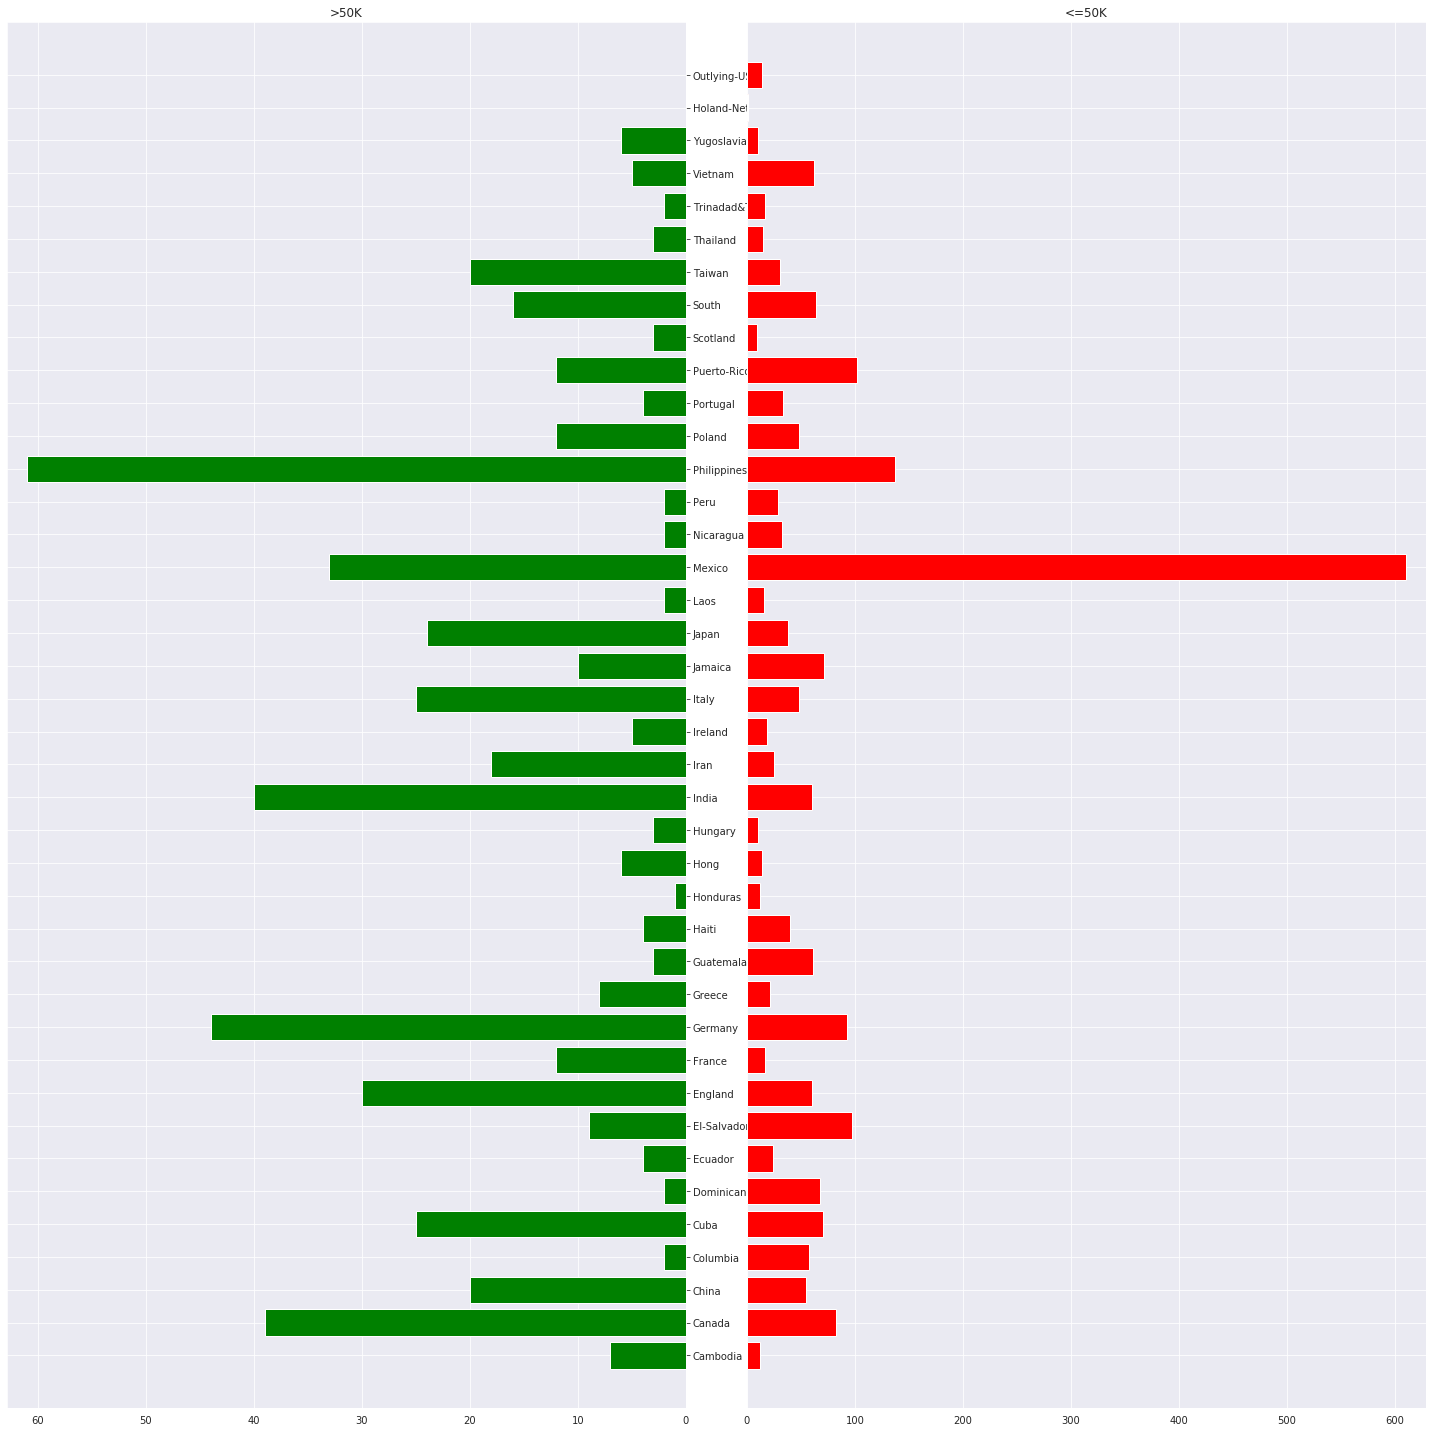

In [325]:
fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(20,20))
axes[0].barh(df_bycountry['Countries'], df_bycountry['>50K'], align='center', color='green', zorder=10)
axes[0].set(title='>50K')
axes[1].barh(df_bycountry['Countries'], df_bycountry['<=50K'], color='red', zorder=10)
axes[1].set(title='<=50K')

axes[0].invert_xaxis()
axes[0].set(yticklabels=df_bycountry['Countries'], )
axes[0].yaxis.tick_right()

for ax in axes.flat:
    ax.margins(0.03)
    ax.grid(True)

fig.tight_layout()
fig.subplots_adjust(wspace=0.09)
plt.show()

**Income**

It's time to do some analysis of our target class.

As we can see here our dataset it's far from being balanced.

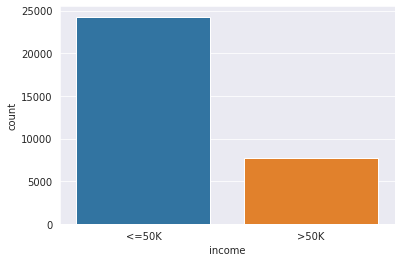

In [326]:
sns.countplot(x='income', data=df)

## Feature Engineering

First of all we are getting the dummies on the income feature.

In [350]:
df['income'] = df['income'].map({'<=50K':0, '>50K':1})

In [351]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,0
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0


In [329]:
df_copy = df.copy()
df_copy

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,0
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,0
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0


In [352]:
df = df.drop('education', axis = 1)

In [335]:
categorical_features = list(df.select_dtypes(include=['object']).columns)

df[df[feature] == '?']

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
14,51,?,172175,Doctorate,16,Never-married,?,Not-in-family,White,Male,0,2824,40,United-States,>50K
24,61,?,135285,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,2603,32,United-States,<=50K
44,71,?,100820,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,2489,15,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32533,35,?,320084,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
32534,30,?,33811,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32541,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32543,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


In [353]:
# Deleting all the ? 

categorical_features = list(df.select_dtypes(include=['object']).columns)


for feature in categorical_features:
    df = df[df[feature] != '?']
df.head()

,age,workclass,fnlwgt,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
3,54,Private,140359,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
4,41,Private,264663,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0
5,34,Private,216864,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,0
6,38,Private,150601,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,0


In [354]:
categorical_features = list(df.select_dtypes(include=['object']).columns)
categorical_features

for feature in categorical_features:
    s = pd.get_dummies(df[feature])
    df = df.join(s)
    df = df.drop(feature, axis = 1)
df.head()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,income,Federal-gov,Local-gov,Private,...,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
1,82,132870,9,0,4356,18,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,54,140359,4,0,3900,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,41,264663,10,0,3900,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
5,34,216864,9,0,3770,45,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
6,38,150601,6,0,3770,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [355]:
df.drop('Female', axis = 1, inplace=True)

## Model and predictions.

In [356]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [357]:
rfc = RandomForestClassifier()

In [358]:
X = df.drop('income', axis = 1)
y = df['income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [359]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [360]:
pred_rfc = rfc.predict(X_test)

In [361]:
from sklearn.metrics import confusion_matrix, classification_report

In [363]:
print(confusion_matrix(y_test, pred_rfc))
print('\n')
print(classification_report(y_test, pred_rfc))

[[6250  526]
 [ 844 1429]]


              precision    recall  f1-score   support

           0       0.88      0.92      0.90      6776
           1       0.73      0.63      0.68      2273

    accuracy                           0.85      9049
   macro avg       0.81      0.78      0.79      9049
weighted avg       0.84      0.85      0.84      9049



Here we see a relatively good model

In [369]:
df[df['income']==1].count()

age                7508
fnlwgt             7508
education.num      7508
capital.gain       7508
capital.loss       7508
                   ... 
Thailand           7508
Trinadad&Tobago    7508
United-States      7508
Vietnam            7508
Yugoslavia         7508
Length: 88, dtype: int64

In [370]:
df[df['income']==0].count()

age                22654
fnlwgt             22654
education.num      22654
capital.gain       22654
capital.loss       22654
                   ...  
Thailand           22654
Trinadad&Tobago    22654
United-States      22654
Vietnam            22654
Yugoslavia         22654
Length: 88, dtype: int64

Since if we suppose all to be lower than 50K x year we will have an accuracy of 0.76 and we had achieved a 0.85 instead we can conclude than our model it looks pretty good.

Study done by Toni Domenech Borrell.